# Analyse de données météo historiques en Essonne


 ### Etudiant : Rafik BENNACER


## Introduction

En science des données vous devrez préparer les données, les analyser (statistiquement) et produire des figures pertinentes dans l'objectif de répondre à différentes questions.

Dans ce Projet, on se demande si le changement climatique est visible là où nous vivons aujourd'hui.

Pour ce faire nous allons étudier l'évolution de la météo au cours des dernières décennies. Météo France, l'organisme national de météorologie en France, a déposé des données climatologiques par département avec de nombreux paramètres disponibles sur le site [data.gouv](https://www.data.gouv.fr/fr/datasets/donnees-climatologiques-de-base-quotidiennes/).

## Chargement des librairies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Chargement du jeu de données

Commencez par récupérer sur le site des données publiques francaises, les données quotidiennes de météo entre 1950 et 2022 en Essonne (département n°91) sur le site [data.gouv](https://www.data.gouv.fr/fr/datasets/donnees-climatologiques-de-base-quotidiennes/).

On ne s'intéresse pour le moment qu'aux données de température et de précipitation.

In [2]:
###meteo = pd.read_csv('Q_91_previous-1950-2022_RR-T-Vent.csv', sep=';')
import gzip
from urllib.request import urlretrieve
def telecharge_fichier(num_dep):
    """
    Téléchargement du dataset pour un département.
    
    :param num_dep: Le numéro du département souhaité.
    La fonction retourne un dataframe avec les données de Températures et de précipitations (et d'autres colonnes)
    """    
    link = 'https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/BASE/QUOT/'
    filename = ("Q_"+str(num_dep) +'_previous-1950-2022_RR-T-Vent.csv.gz')
    url = link + filename
    path, headers = urlretrieve(url, filename)
    with gzip.open(filename) as f:
        meteofile = pd.read_csv(f,sep = ";")
    return meteofile

meteo = telecharge_fichier(91)


In [3]:
meteo.shape

(471444, 56)

In [4]:
meteo.describe()

,NUM_POSTE,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,HTN,...,DXI2,QDXI2,HXI2,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S
count,4.714440e+05,471444.000000,471444.000000,471444.000000,4.714440e+05,471023.000000,471037.000000,190525.000000,190587.000000,69131.000000,...,6476.000000,6496.000000,6476.000000,6495.000000,5200.000000,5200.000000,0.0,1.0,5200.000000,5200.000000
mean,9.132070e+07,48.532816,2.250990,110.378123,1.990076e+07,1.768032,1.007588,6.768607,0.999995,714.339761,...,191.087091,3.442734,1144.599290,6.850500,10.222135,0.999808,NaN,1.0,1323.136346,8.984615
std,1.993417e+05,0.131051,0.153988,34.895113,1.923796e+05,4.009847,0.244623,5.767672,0.002291,615.123359,...,100.524452,3.684115,518.364362,3.545425,3.528234,0.013868,NaN,NaN,511.995078,0.350519
min,9.102700e+07,48.315833,1.932667,34.000000,1.950010e+07,0.000000,0.000000,-20.600000,0.000000,0.000000,...,10.000000,1.000000,15.000000,1.000000,2.400000,0.000000,NaN,1.0,0.000000,1.000000
25%,9.114500e+07,48.406667,2.135833,78.000000,1.975033e+07,0.000000,1.000000,2.500000,1.000000,349.000000,...,100.000000,1.000000,945.000000,1.000000,7.800000,1.000000,NaN,1.0,1110.000000,9.000000
50%,9.127500e+07,48.526167,2.269500,115.000000,1.992012e+07,0.000000,1.000000,7.000000,1.000000,506.000000,...,200.000000,1.000000,1145.000000,9.000000,9.800000,1.000000,NaN,1.0,1334.000000,9.000000
75%,9.146900e+07,48.664500,2.381167,146.000000,2.006110e+07,1.700000,1.000000,11.100000,1.000000,715.000000,...,280.000000,9.000000,1415.000000,9.000000,12.100000,1.000000,NaN,1.0,1611.000000,9.000000
max,9.168700e+07,48.755000,2.494000,163.000000,2.022123e+07,110.700000,9.000000,24.400000,1.000000,2359.000000,...,360.000000,9.000000,2345.000000,9.000000,28.600000,1.000000,NaN,1.0,2359.000000,9.000000


In [5]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471444 entries, 0 to 471443
Data columns (total 56 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   NUM_POSTE  471444 non-null  int64  
 1   NOM_USUEL  471444 non-null  object 
 2   LAT        471444 non-null  float64
 3   LON        471444 non-null  float64
 4   ALTI       471444 non-null  int64  
 5   AAAAMMJJ   471444 non-null  int64  
 6   RR         471023 non-null  float64
 7   QRR        471037 non-null  float64
 8   TN         190525 non-null  float64
 9   QTN        190587 non-null  float64
 10  HTN        69131 non-null   float64
 11  QHTN       69429 non-null   float64
 12  TX         190622 non-null  float64
 13  QTX        190673 non-null  float64
 14  HTX        69188 non-null   float64
 15  QHTX       69429 non-null   float64
 16  TM         93652 non-null   float64
 17  QTM        93660 non-null   float64
 18  TNTXM      190353 non-null  float64
 19  QTNTXM     190370 non-n

In [6]:
meteo.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,DXI2,QDXI2,HXI2,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S
0,91027002,ORLY,48.718,2.397,86,19500101,0.0,1.0,-3.1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91027002,ORLY,48.718,2.397,86,19500102,1.0,1.0,-6.2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,91027002,ORLY,48.718,2.397,86,19500103,0.8,1.0,1.2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,91027002,ORLY,48.718,2.397,86,19500104,0.9,1.0,8.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,91027002,ORLY,48.718,2.397,86,19500105,1.4,1.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:

nb_postes = meteo['NUM_POSTE'].nunique()
nb_postes

49

## Exploration des données


    
Le DataFrame "meteo" a une dimension de (471444, 56)
    <br>
Il y a un total de 49 postes météorologiques inclus dans les données
<br> 
Dans le DataFrame, il existe de nombreuses données manquantes et qui ne sont pas pertinentes pour notre étude.
Dans notre étude, j'ai choisi de conserver uniquement quelques colonnes pertinentes a notre etude , 
Pour les valeurs NaN dans mon jeu de données , j'ai decidé de supprimer ces lignes . 



In [8]:
# Liste des colonnes à conserver 
colonnes_a_garder = ['NUM_POSTE', 'NOM_USUEL' , 'AAAAMMJJ', 'TNTXM', 'RR']

raw_data = meteo[colonnes_a_garder]
print ( raw_data.shape)
raw_data.head()


(471444, 5)


,NUM_POSTE,NOM_USUEL,AAAAMMJJ,TNTXM,RR
0,91027002,ORLY,19500101,-0.6,0.0
1,91027002,ORLY,19500102,1.4,1.0
2,91027002,ORLY,19500103,5.7,0.8
3,91027002,ORLY,19500104,8.8,0.9
4,91027002,ORLY,19500105,7.5,1.4


### Cleaning Data 


In [9]:
raw_data= raw_data.copy()


In [10]:
raw_data['AAAAMMJJ'] = pd.to_datetime(raw_data['AAAAMMJJ'], format='%Y%m%d')
raw_data.head()

,NUM_POSTE,NOM_USUEL,AAAAMMJJ,TNTXM,RR
0,91027002,ORLY,1950-01-01,-0.6,0.0
1,91027002,ORLY,1950-01-02,1.4,1.0
2,91027002,ORLY,1950-01-03,5.7,0.8
3,91027002,ORLY,1950-01-04,8.8,0.9
4,91027002,ORLY,1950-01-05,7.5,1.4


In [11]:
raw_data.dropna(subset=['TNTXM'], inplace=True)

In [12]:
meteo_cleaned = raw_data.copy()


In [13]:
meteo_cleaned.head()

,NUM_POSTE,NOM_USUEL,AAAAMMJJ,TNTXM,RR
0,91027002,ORLY,1950-01-01,-0.6,0.0
1,91027002,ORLY,1950-01-02,1.4,1.0
2,91027002,ORLY,1950-01-03,5.7,0.8
3,91027002,ORLY,1950-01-04,8.8,0.9
4,91027002,ORLY,1950-01-05,7.5,1.4


- Combien de stations restent dans notre étude ?


In [14]:

nb_postes = meteo_cleaned['NUM_POSTE'].nunique()
print(nb_postes)



15


On a gardé 15 postes , toute en Essonne.


In [15]:
meteo_cleaned.describe()

,NUM_POSTE,AAAAMMJJ,TNTXM,RR
count,1.903530e+05,190353,190353.000000,189935.000000
mean,9.122600e+07,1994-05-25 21:30:30.609446656,11.275958,1.761492
min,9.102700e+07,1950-01-01 00:00:00,-15.300000,0.000000
25%,9.110300e+07,1983-03-24 00:00:00,6.500000,0.000000
50%,9.121600e+07,1995-07-28 00:00:00,11.300000,0.000000
75%,9.127500e+07,2008-02-05 00:00:00,16.400000,1.600000
max,9.167900e+07,2022-12-31 00:00:00,33.200000,110.700000
std,1.662907e+05,NaN,6.527018,3.997533


## Analyse des données


### Tendances annuelles

*Quelles sont les tendances annuelles dans les données météorologiques depuis 1950 ? La température moyenne a-t-elle changée ? Est-ce qu'il y a plus ou moins de précipitations ?*




### Gestion de valeurs abérrantes 

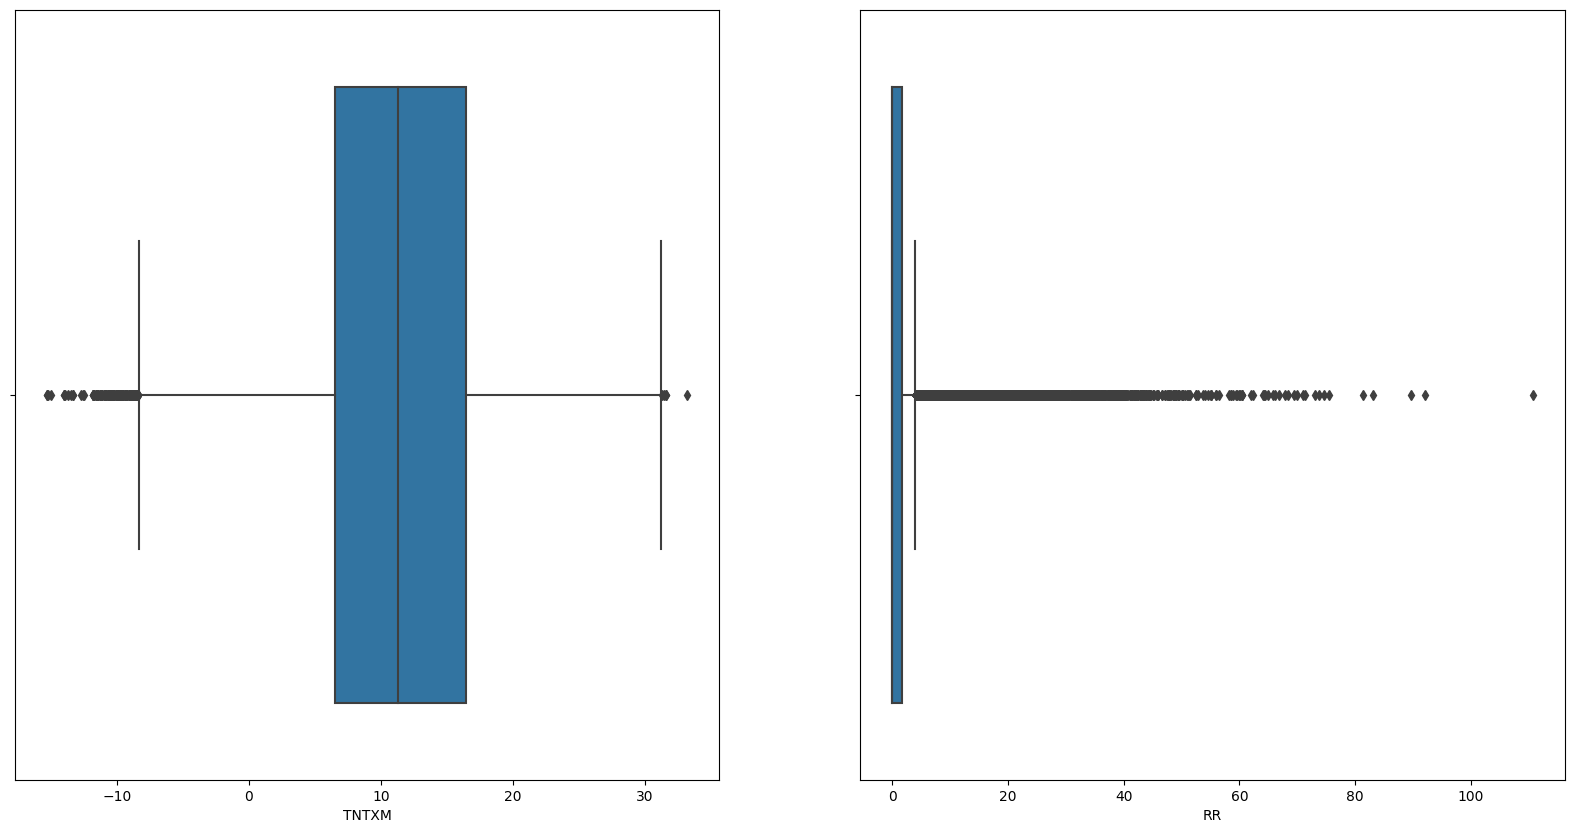

In [16]:
num_atts = num_atts = ['TNTXM', 'RR']

fig, axes = plt.subplots(1, 2, figsize=(20, 10)) 

for i, att in enumerate(num_atts):
    sns.boxplot(ax=axes[i], x=att, data=meteo_cleaned)

plt.show()

Pour éliminer les valeurs aberrantes (observations en dehors des lignes les plus à gauche et les plus à droite sur les boîtes ), nous utiliserons l'écart interquartile ( IQR ). La ligne de gauche  ($l1$) est égale à la différence entre le premier quartile ($Q1$/25<sup>th</sup> percentile) et $1.5 IQR$. La ligne de droite ($l2$) est égale à l'addition du troisième quartile ($Q3$/75<sup>th</sup> percentile) et $1.5 IQR$.

$ l1 = Q1 - 1.5 * IQR $

$ l2 = Q3 + 1.5 *IQR $, 

Ou $ IQR = Q3 - Q1 $.


In [17]:
iqr = meteo_cleaned['TNTXM'].quantile(0.75) - meteo_cleaned['TNTXM'].quantile(0.25)
l1 = meteo_cleaned['TNTXM'].quantile(0.25) - 1.5*iqr
l2 = meteo_cleaned['TNTXM'].quantile(0.75) + 1.5*iqr


data_1 = meteo_cleaned[np.logical_and(meteo_cleaned['TNTXM'] < l2, meteo_cleaned['TNTXM'] > l1)]
data_1.describe(include = 'all')
data_1 = data_1.copy()
data_1.head()

,NUM_POSTE,NOM_USUEL,AAAAMMJJ,TNTXM,RR
0,91027002,ORLY,1950-01-01,-0.6,0.0
1,91027002,ORLY,1950-01-02,1.4,1.0
2,91027002,ORLY,1950-01-03,5.7,0.8
3,91027002,ORLY,1950-01-04,8.8,0.9
4,91027002,ORLY,1950-01-05,7.5,1.4


## Température

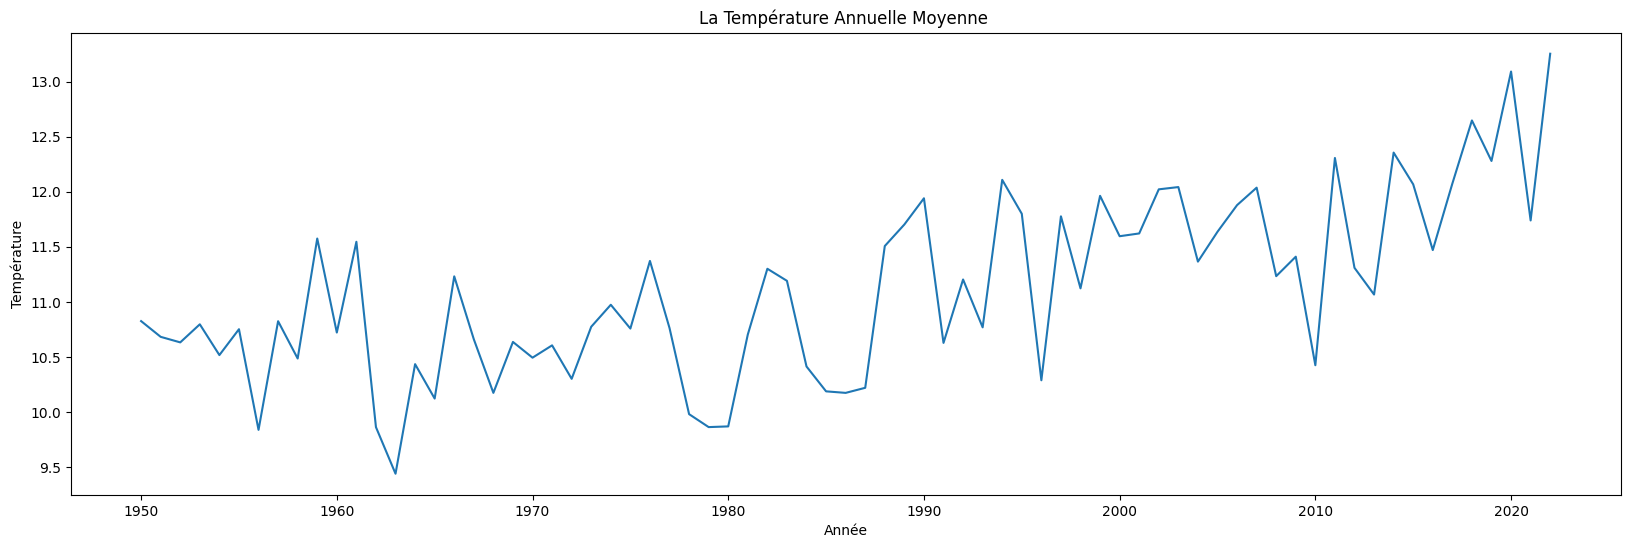

In [18]:
data_1['Année'] = data_1['AAAAMMJJ'].dt.year
moyenne_annee = data_1.groupby('Année')['TNTXM'].mean().reset_index()

plt.figure(figsize=(20, 6))
plt.plot(moyenne_annee['Année'], moyenne_annee['TNTXM'])
plt.xlabel('Année')
plt.ylabel('Température')
plt.title('La Température Annuelle Moyenne ')
plt.show()

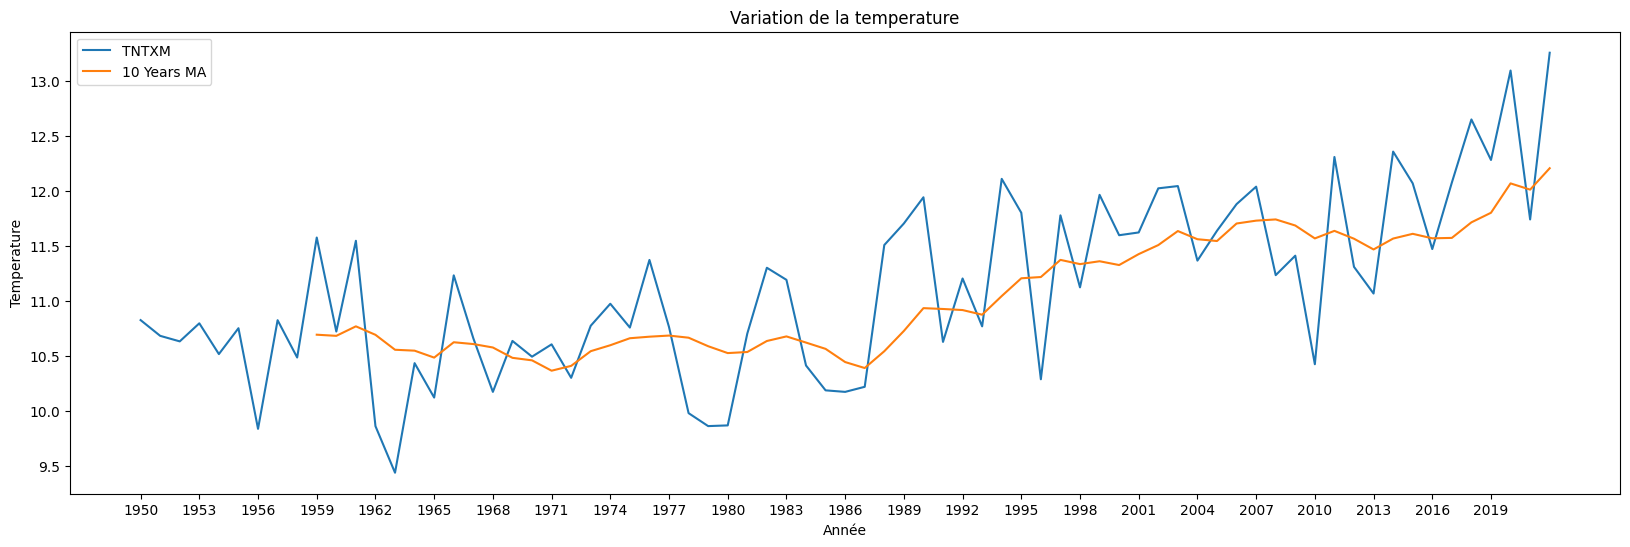

In [19]:
year_avg = pd.pivot_table(data_1, values='TNTXM', index='Année', aggfunc='mean')
year_avg['10 Years MA'] = year_avg['TNTXM'].rolling(10).mean() ## j'ai appliqué un moving avearge de 10 
year_avg[['TNTXM','10 Years MA']].plot(figsize=(20,6))
plt.title('Variation de la temperature')
plt.xlabel('Année')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1950,2022,3)])
plt.show()

### Nous pouvons confirmer qu'il existe une tendance à la hausse constante et que la température moyenne est passée de 10,7º à 12.2º, soit une augmentation de 1.5º sur plus de 72 ans.

Il faut savoir que les données des années 1950 pourraient potentiellement être moins précises, en raison de la technologie disponible à l'époque pour effectuer des mesures.

## Regression Linéaire
## Température

A. Declare the inputs and the targets

In [20]:
data_1.head()

,NUM_POSTE,NOM_USUEL,AAAAMMJJ,TNTXM,RR,Année
0,91027002,ORLY,1950-01-01,-0.6,0.0,1950
1,91027002,ORLY,1950-01-02,1.4,1.0,1950
2,91027002,ORLY,1950-01-03,5.7,0.8,1950
3,91027002,ORLY,1950-01-04,8.8,0.9,1950
4,91027002,ORLY,1950-01-05,7.5,1.4,1950


In [21]:
moyenne_annuelle = data_1.groupby('Année')['TNTXM'].mean().reset_index()
X = moyenne_annuelle[['Année']] - data_1['Année'].min()  
y = moyenne_annuelle['TNTXM']
moyenne_annuelle.head()

,Année,TNTXM
0,1950,10.825753
1,1951,10.682877
2,1952,10.632558
3,1953,10.796712
4,1954,10.517265


In [22]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [23]:

X_temp = moyenne_annuelle[['Année']]  
y_temp = moyenne_annuelle['TNTXM']   


split_date = 2010
train_temp = moyenne_annuelle[moyenne_annuelle['Année'] < split_date]
test_temp = moyenne_annuelle[moyenne_annuelle['Année'] >= split_date]

X_train_temp, y_train_temp = train_temp[['Année']], train_temp['TNTXM']
X_test_temp, y_test_temp = test_temp[['Année']], test_temp['TNTXM']





In [24]:
model_temp = LinearRegression()

In [25]:
model_temp.fit(X_train_temp, y_train_temp)

predictions_temp = model_temp.predict(X_test_temp)

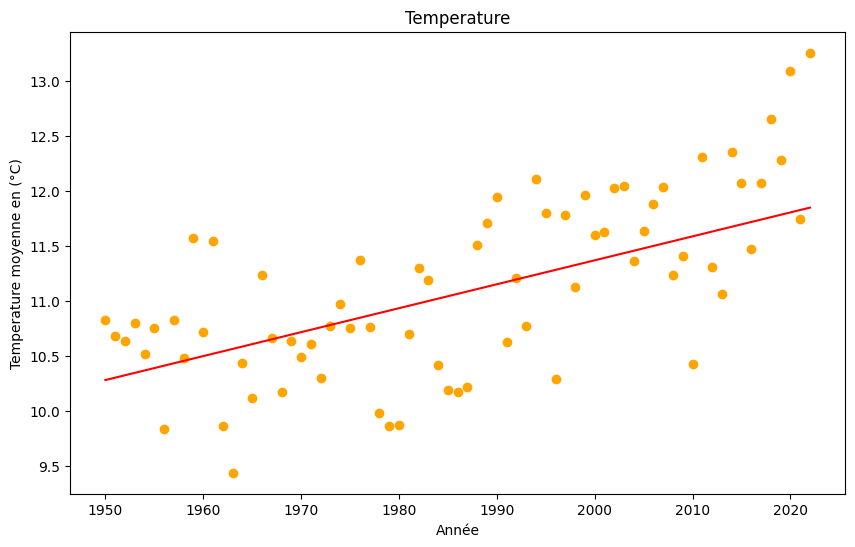

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(X_temp, y_temp, color='orange')
plt.plot(X_temp, model_temp.predict(X_temp), color='red')
plt.xlabel('Année')
plt.ylabel('Temperature moyenne en (°C)')
plt.title('Temperature')
plt.show()


### On voit bien au fil des années, une tendance à la hausse des températures en Essonne , ce qui peut être interprété comme une manifestation des effets du changement climatique.

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
mse_temp = mean_squared_error(y_test_temp, predictions_temp)
r2_temp = r2_score(y_test_temp, predictions_temp)
print(f" MSE: {mse_temp}, R2: {r2_temp}")


 MSE: 0.5955317702374898, R2: -0.009558662916552274


## Précipitation

In [28]:
raw_data.dropna(subset=['RR'], inplace=True)

In [29]:
data_2 = raw_data.copy()
data_2['Month'] = data_2['AAAAMMJJ'].dt.month

In [30]:
data_2['Année'] = data_2['AAAAMMJJ'].dt.year
moyenne_annee_precip = data_2.groupby('Année')['RR'].mean().reset_index()

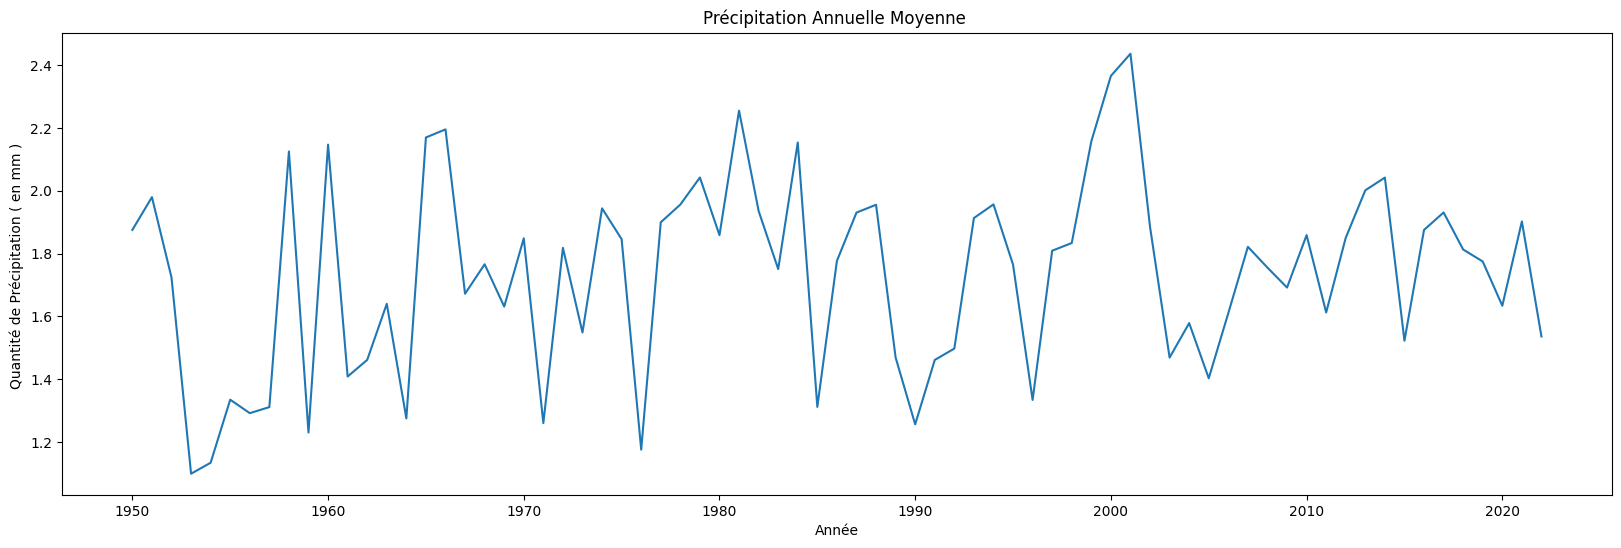

In [31]:
plt.figure(figsize=(20, 6))
plt.plot(moyenne_annee_precip['Année'], moyenne_annee_precip['RR'])
plt.xlabel('Année')
plt.ylabel('Quantité de Précipitation ( en mm ) ')
plt.title('Précipitation Annuelle Moyenne ')
plt.show()

In [32]:
year_avg = pd.pivot_table(data_2, values='RR', index='Année', aggfunc='mean')
year_avg['10 Years MA'] = year_avg['RR'].rolling(10).mean()


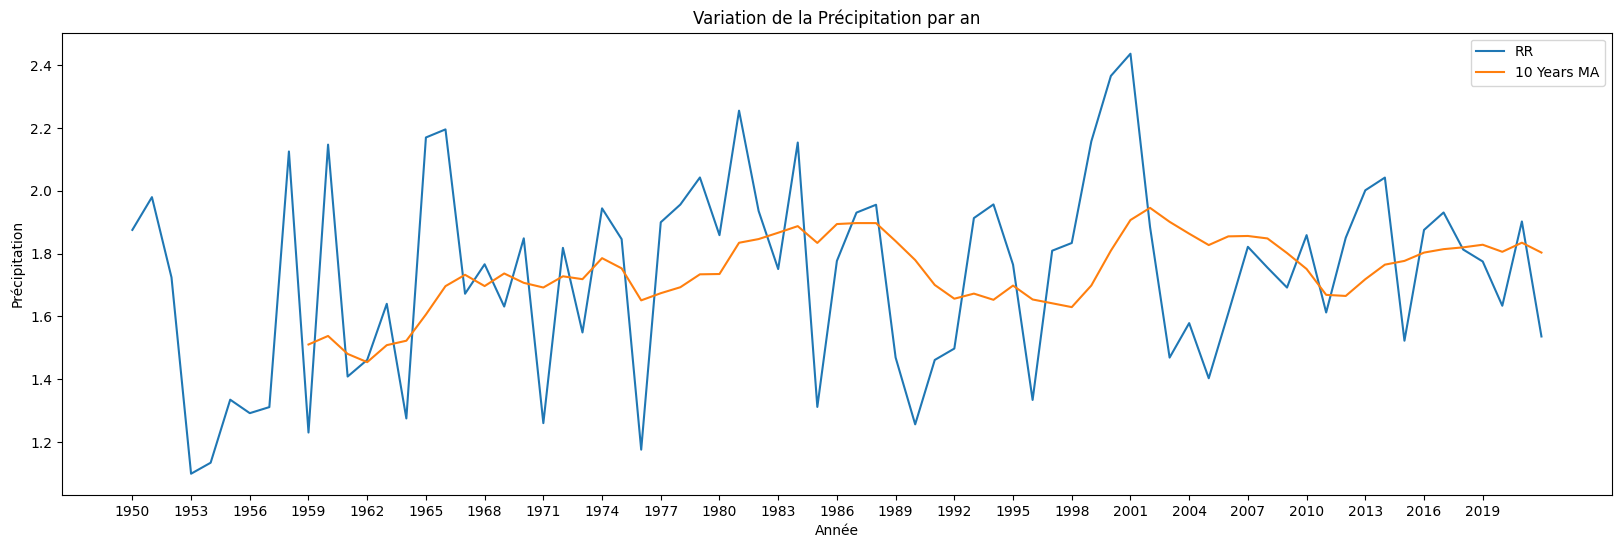

In [33]:
year_avg[['RR','10 Years MA']].plot(figsize=(20,6))
plt.title('Variation de la Précipitation par an')
plt.xlabel('Année')
plt.ylabel('Précipitation')
plt.xticks([x for x in range(1950,2022,3)])
plt.show()

In [34]:
moyenne_journaliere = data_2.groupby('AAAAMMJJ')['RR'].mean().reset_index()
moyenne_journaliere.columns = ['Date', 'Precipitation']

In [35]:
moyenne_journaliere['Mois'] = moyenne_journaliere['Date'].dt.to_period('M')
precip_mensuelle = moyenne_journaliere.groupby('Mois')['Precipitation'].sum().reset_index()
precip_mensuelle.columns = ['Mois', 'Precipitation']

In [36]:
precip_mensuelle['Année'] = precip_mensuelle['Mois'].dt.year
precip_annuelle = precip_mensuelle.groupby('Année')['Precipitation'].sum().reset_index()
precip_annuelle.columns = ['Année', 'Total_Precipitation']
precip_annuelle.head()

,Année,Total_Precipitation
0,1950,684.45
1,1951,722.55
2,1952,630.30
3,1953,401.05
4,1954,413.50


In [37]:

X_precip = precip_annuelle['Année']  
y_precip= precip_annuelle['Total_Precipitation']   


split_date = 2010
train_precip = precip_annuelle[precip_annuelle['Année']  < split_date]
test_precip= precip_annuelle[precip_annuelle['Année']   >= split_date]

X_train_precip, y_train_precip = train_precip[['Année']], train_precip['Total_Precipitation']
X_test_precip, y_test_precip = test_precip[['Année']], test_precip['Total_Precipitation']



In [38]:
model_precip = LinearRegression()

In [39]:
model_precip.fit(X_train_precip, y_train_precip)
predictions_precip = model_precip.predict(X_test_precip)

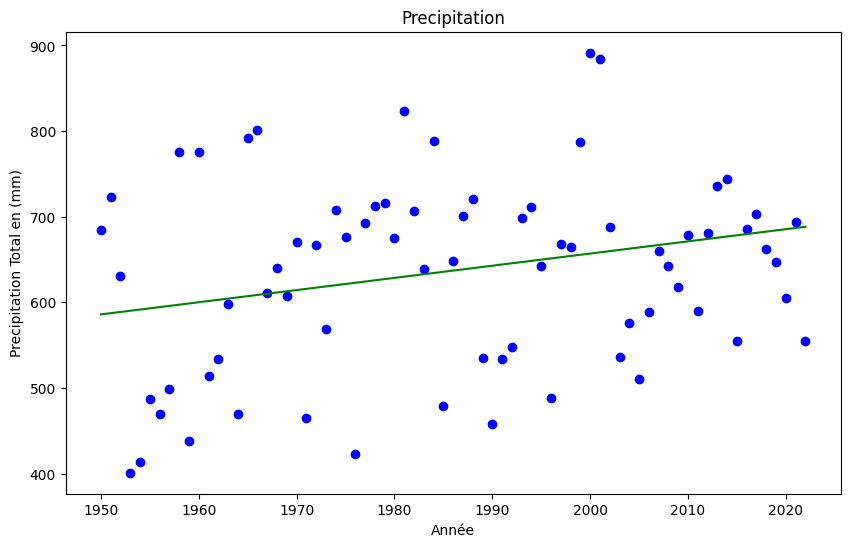

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(precip_annuelle['Année'], precip_annuelle['Total_Precipitation'], color='blue')
plt.plot(precip_annuelle['Année'], model_precip.predict(precip_annuelle[['Année']]), color='green')
plt.xlabel('Année')
plt.ylabel('Precipitation Total en (mm)')
plt.title('Precipitation')
plt.show()


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
mse_precip = mean_squared_error(y_test_precip, predictions_precip)
r2_precip = r2_score(y_test_precip, predictions_temp)
print(f" MSE: {mse_precip}, R2: {r2_precip}")

 MSE: 4371.2341028131505, R2: -114.39938458845397


### La régression linéaire appliquée aux données de précipitations en Essonne a démontré une relative stabilité. Les résultats de cette analyse suggèrent que la quantité de précipitations sur la période étudiée ne présente pas de variations significatives

Le r2 est tellement mauvais que ca veut dire que la régression linéaire ne convient aps du tout.

### Variabilité saisonnière 

Analysez la variabilité saisonnière des données. 

- Manipulez les données pour les regrouper mois par mois. Y a-t-il des tendances ? 

### Température

In [42]:
# je vais créer une table pivot pour tracer les températures mensuelles au fil des ans
data_1.set_index('AAAAMMJJ', inplace=True)
data_1['Mois'] = data_1.index.month
data_1['Année'] = data_1.index.year

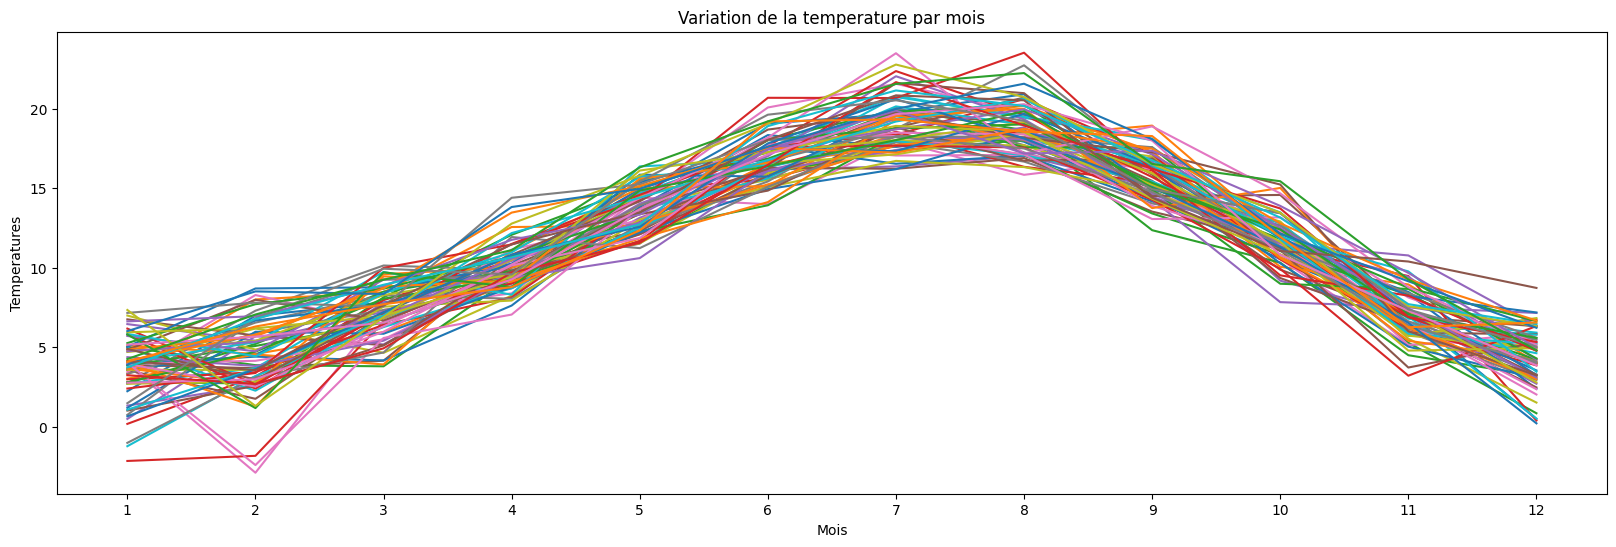

In [43]:

pivot = pd.pivot_table(data_1, values='TNTXM', index='Mois', columns='Année', aggfunc='mean')
pivot.plot(figsize=(20,6))
plt.title('Variation de la temperature par mois')
plt.xlabel('Mois')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

### La série montre clairement une saisonnalité, les températures les plus élevées se situent autour de Juin et fin Aout, et les plus basses entre Novembre et Février. Pour clarifier les choses, je vais fusionner ces lignes en une seule, en faisant la moyenne des niveaux mensuels


Maintenant, je vais vérifier s'il y a une tendance au fil des années dans cette série.

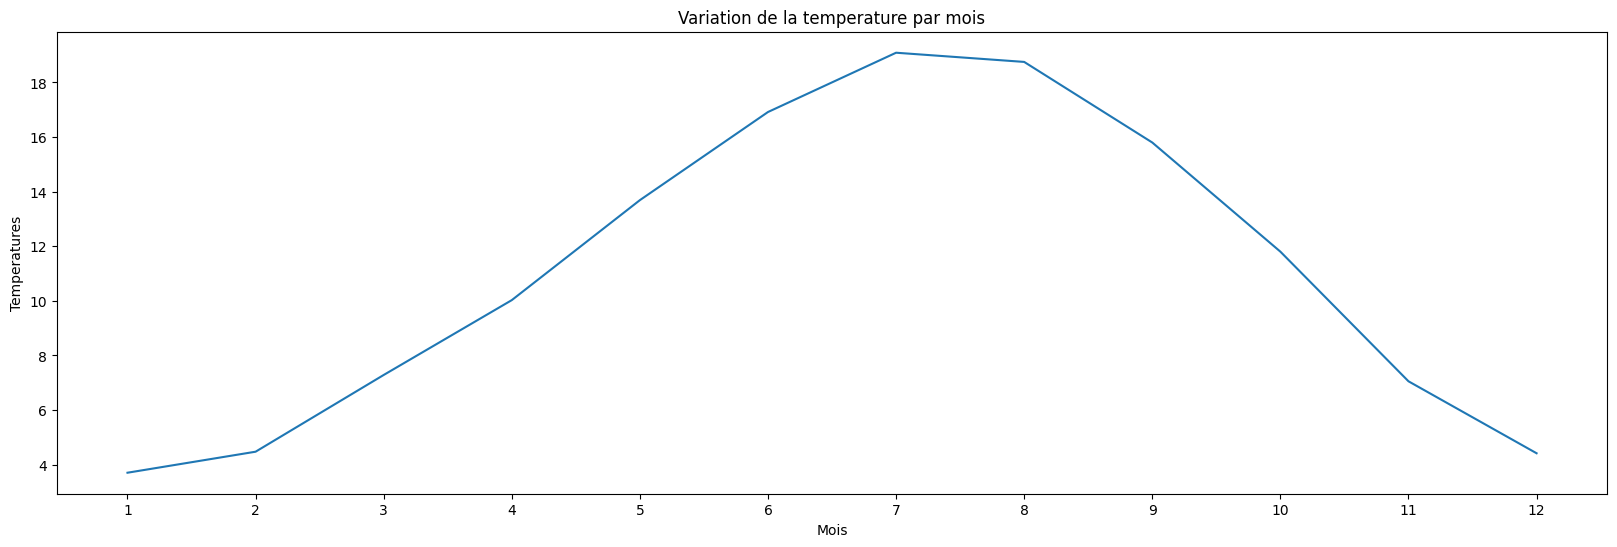

In [44]:
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Variation de la temperature par mois')
plt.xlabel('Mois')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1,13)])
plt.show()

In [45]:
# Créez une nouvelle colonne 'Mois_Num' pour stocker juste le numéro du mois.
precip_mensuelle['Mois_Num'] = precip_mensuelle['Mois'].dt.month

moyenne_par_mois = precip_mensuelle.groupby('Mois_Num')['Precipitation'].mean().reset_index()
moyenne_par_mois.head()

,Mois_Num,Precipitation
0,1,52.783771
1,2,45.752870
2,3,46.678459
3,4,45.346251
4,5,58.962204


### Corrélation

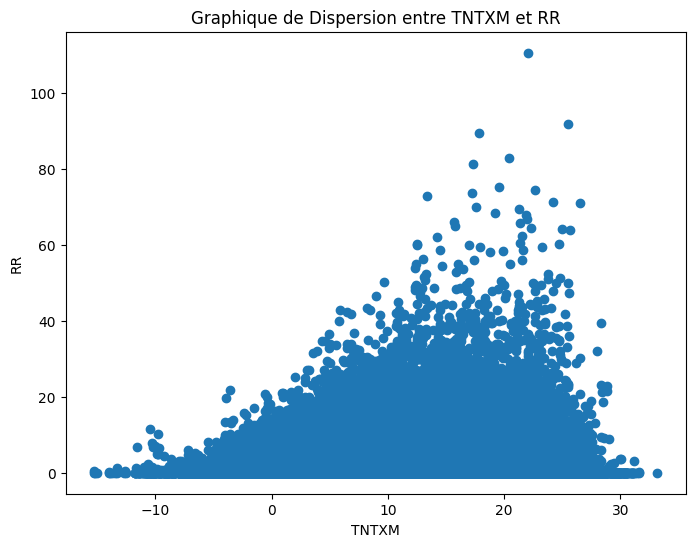

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(meteo_cleaned['TNTXM'], meteo_cleaned['RR'])
plt.title('Graphique de Dispersion entre TNTXM et RR')
plt.xlabel('TNTXM')
plt.ylabel('RR')
plt.show()

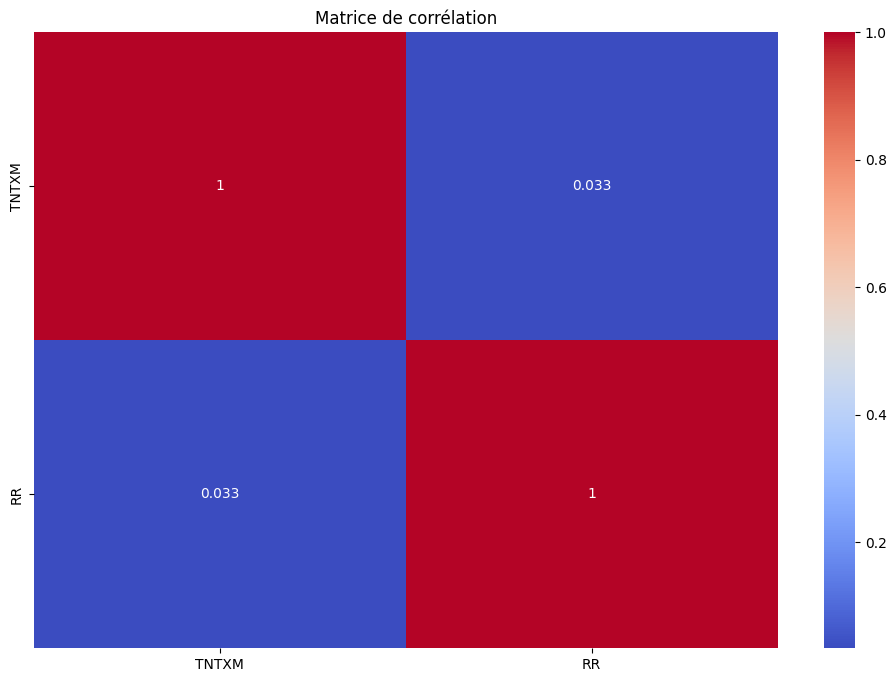

In [47]:
meteo_cleaned = meteo_cleaned.drop(['AAAAMMJJ' , 'NUM_POSTE' , 'NOM_USUEL' ], axis = 1 ) 
correlation_matrix = meteo_cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

### Il semble qu'il n'y ait pas de lien significatif ou de corrélation apparente entre la température (TNTXM) et les précipitations (RR)

### Autres paramètres

En reprenant la table `meteo` initiale et peut-etre d'autres données de Météo France, y a-t-il d'autres facteurs que la précipitation qui correle avec les temperatures ?
Sans faire une étude exhaustive, étudiez les corrélations entre les différentes variables qui vous semblent intéressantes. 

Commentez vos analyses

In [48]:
cag = ['TNTXM' ,'TNSOL' ,'TN50'  , 'HTN' , 'FFM' , 'FXI' , 'FXY'] 

In [49]:
df = meteo[cag]
df.dropna()

,TNTXM,TNSOL,TN50,HTN,FFM,FXI,FXY
99103,8.6,4.2,4.8,535.0,7.0,19.0,12.0
99104,11.2,8.7,8.7,1801.0,11.8,25.0,19.0
99105,7.4,4.7,5.3,750.0,9.9,20.0,14.0
99106,8.9,5.0,5.6,240.0,9.0,18.0,13.0
99107,11.2,8.4,8.7,2310.0,8.8,17.0,13.0
...,...,...,...,...,...,...,...
106404,5.5,4.0,4.0,845.0,4.5,12.0,8.0
106405,6.9,4.2,4.6,2045.0,6.3,15.0,10.0
106406,5.8,0.1,1.5,815.0,2.6,7.0,4.0
106407,4.4,0.7,2.1,500.0,1.6,5.0,4.0


In [50]:
df.describe()

,TNTXM,TNSOL,TN50,HTN,FFM,FXI,FXY
count,190353.000000,47120.000000,17878.000000,69131.000000,68274.000000,68195.000000,50054.000000
mean,11.275958,4.988453,6.167446,714.339761,3.525169,10.334249,6.619787
std,6.527018,6.074873,5.898055,615.123359,1.888563,4.131189,2.740970
min,-15.300000,-33.200000,-23.500000,0.000000,0.000000,0.000000,0.000000
25%,6.500000,0.500000,1.800000,349.000000,2.100000,7.300000,4.800000
50%,11.300000,5.200000,6.400000,506.000000,3.200000,10.000000,6.000000
75%,16.400000,9.600000,10.700000,715.000000,4.500000,12.300000,8.000000
max,33.200000,22.200000,22.700000,2359.000000,14.000000,50.000000,32.000000


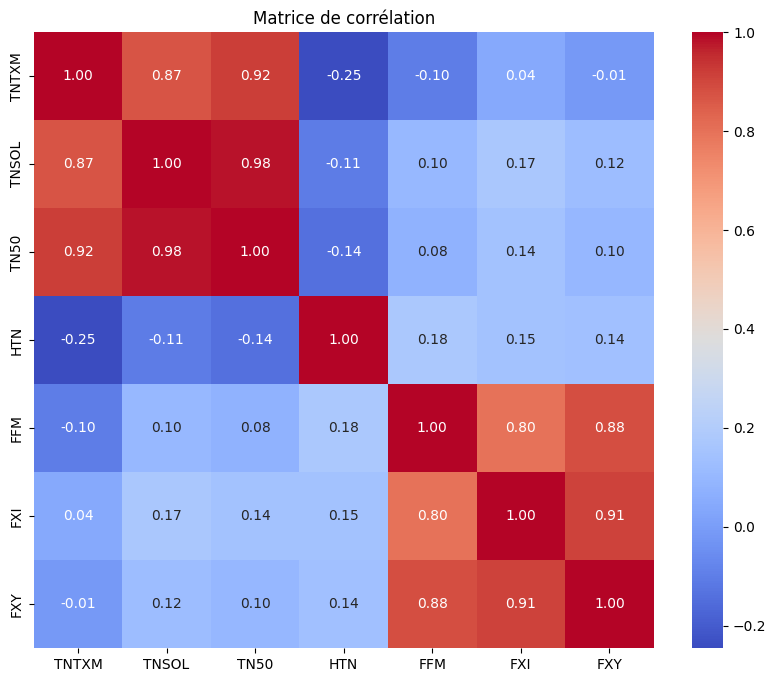

In [51]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [52]:
predictor = 'TNTXM'
features = ['TNSOL', 'TN50', 'HTN', 'FFM', 'FXI', 'FXY']
num_features = len(features)

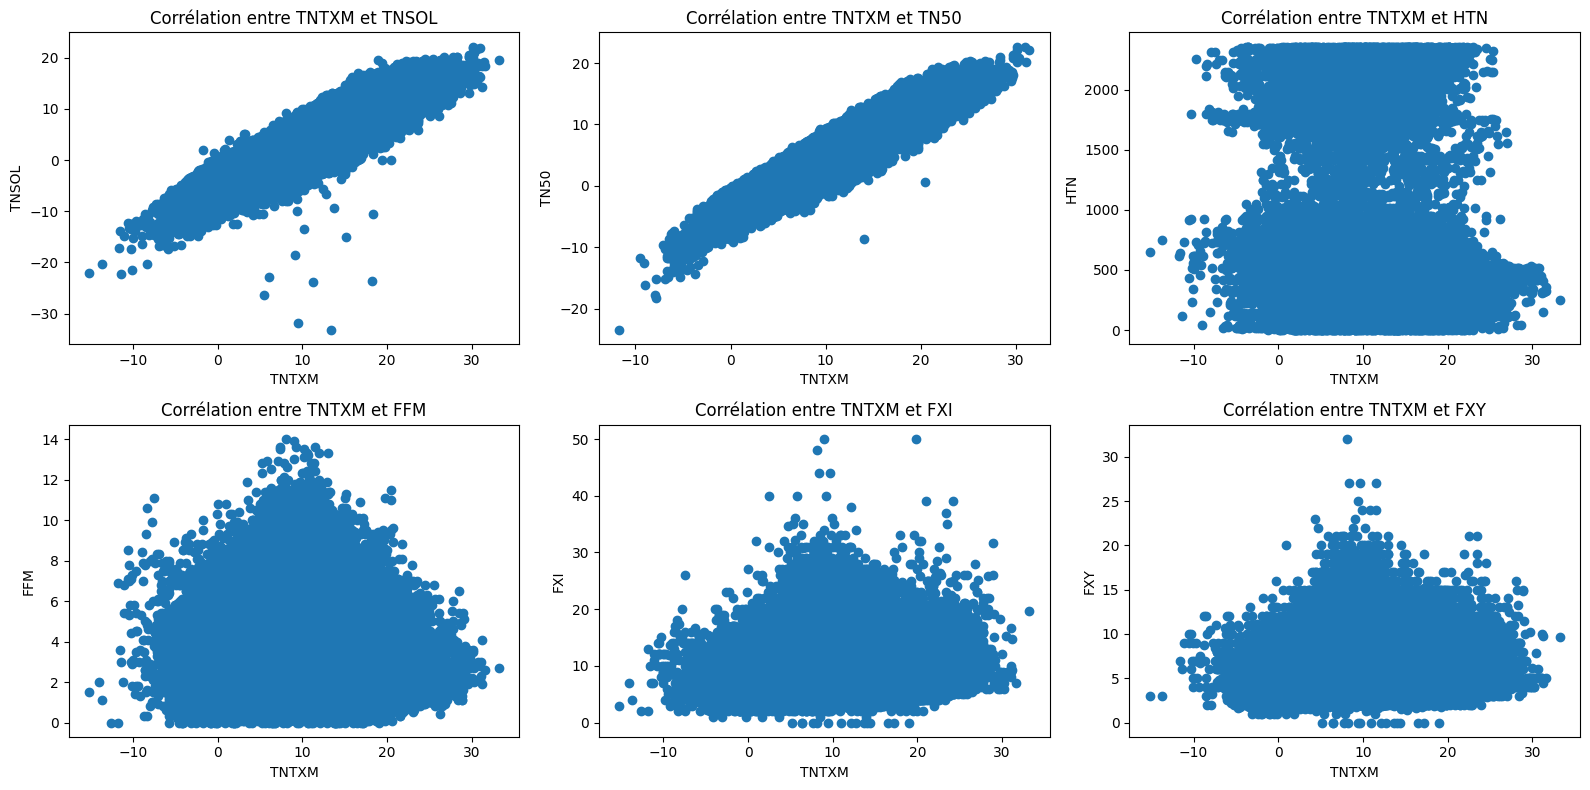

In [53]:
plt.figure(figsize=(16, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[predictor], df[feature])
    plt.xlabel(predictor)
    plt.ylabel(feature)
    plt.title(f'Corrélation entre {predictor} et {feature}')
plt.tight_layout()
plt.show()

### Il semble qu'il n'y ait pas vraiment de corrélation significative entre TNTXM et la plupart des autres données météorologiques. 
### Cependant, nous pouvons observer une corrélation avec TN50  et TNSOL ( température quotidienne minimale à 50 cm au-dessus du sol et à 10 cm au-dessus ) 

## Optimisation du code 

Pourriez-vous optimiser votre code pour améliorer l'efficacité, en particulier lorsqu'il s'agit de manipuler de grandes quantités de données ?

Transformez votre code en un programme (avec des fonctions) pour qu'on puisse refaire la même analyse avec un autre département.

### Lire un jeu de données directement d'un URL

In [54]:
### au lieu d'utiliser la fonction de read_csv de pandas, j'ai utilisé la fonction de telecharge_fichier pour télécharger le fichier directement depuis le site web
import gzip
from urllib.request import urlretrieve
def telecharge_fichier(num_dep):
    """
    Téléchargement du dataset pour un département.
    
    :param num_dep: Le numéro du département souhaité.
    La fonction retourne un dataframe avec les données de Températures et de précipitations (et d'autres colonnes)
    """    
    link = 'https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/BASE/QUOT/'
    filename = ("Q_"+str(num_dep) +'_previous-1950-2022_RR-T-Vent.csv.gz')
    url = link + filename
    path, headers = urlretrieve(url, filename)
    with gzip.open(filename) as f:
        meteofile = pd.read_csv(f,sep = ";")
    return meteofile

meteo = telecharge_fichier(91)

In [55]:
### mise en fonction de la linear regression 
def predictions_temporelles(data, label, split_date=2010):
    train = data[data['AAAA'] < split_date]
    test = data[data['AAAA'] >= split_date]

    X_train, y_train = train[['AAAA']], train[label]
    X_test, y_test = test[['AAAA']], test[label]

    model = LinearRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f"Calculs et prédiction pour la {label}")
    print(f"Erreur quadratique moyenne : {mse}")
    print(f"r2 : {r2}")
    return model

###
